# Graph

In [1]:
%cd -q ..

In [2]:
import networkx as nx

import weldx
from weldx.asdf.tags.weldx.core.graph import (
    MeasurementChain,
    SignalClass,
    SignalTransform,
)

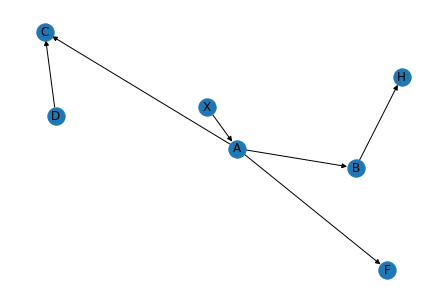

In [3]:
G = nx.DiGraph()
G.add_edges_from(
    [("A", "B"), ("A", "C"), ("A", "F"), ("D", "C"), ("B", "H"), ("X", "A")]
)
nx.draw(G, with_labels=True)

In [4]:
signal = SignalClass("The Signal", 12.3)
nx.set_node_attributes(G, signal, "signal")

In [5]:
signal_transform = SignalTransform(func="a*b + c")
nx.set_edge_attributes(G, signal_transform, "signal_transform")

In [6]:
m = MeasurementChain(graph=G)

In [7]:
buff = weldx.asdf.util.write_buffer(dict(measurement_chain=m))
weldx.asdf.util.asdf_json_repr(buff, ("measurement_chain",))

<IPython.core.display.JSON object>

In [8]:
weldx.asdf.util.notebook_fileprinter(buff)

In [9]:
tree = weldx.asdf.util.read_buffer(buff)

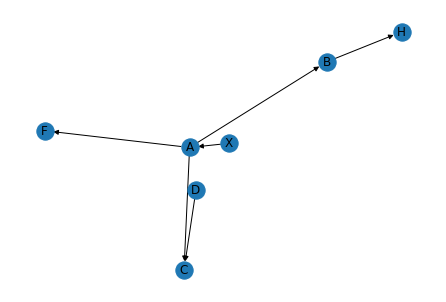

In [10]:
G2 = tree["measurement_chain"].graph
nx.draw(G2, with_labels=True)

In [11]:
assert sorted(G2.edges) == sorted(G.edges)
assert sorted(G2.nodes) == sorted(G.nodes)

In [12]:
for node in G:
    assert G.nodes[node] == G2.nodes[node]

In [13]:
for edge in G.edges:
    assert G.edges[edge] == G2.edges[edge]